In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
#Reading the data from CSV file and intiating to a variable named data
happiness_file = pd.read_csv("happiness_score_dataset copy.csv") 

In [3]:
happiness_file.head() 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
#After seeing the dataset I feel country and region doesnot make a person feel happy or sad, So we can drop the columns.And the Happiness Rank also given on the basis of Indexs so we can go ahead and drop the Happiness rank column

In [4]:
happiness_file.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
happiness_file.drop(['Country','Region','Happiness Rank'],axis=1,inplace=True)


In [6]:
happiness_file.head()


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:

#Checking for no of rows and no of columns of the dataset
happiness_file.shape

(158, 9)

In [8]:
#Checking for null values by using isnull method
happiness_file.isna().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:

#Checking for type of data
happiness_file.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [10]:
#Checking the statistics of the dataset
happiness_file.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


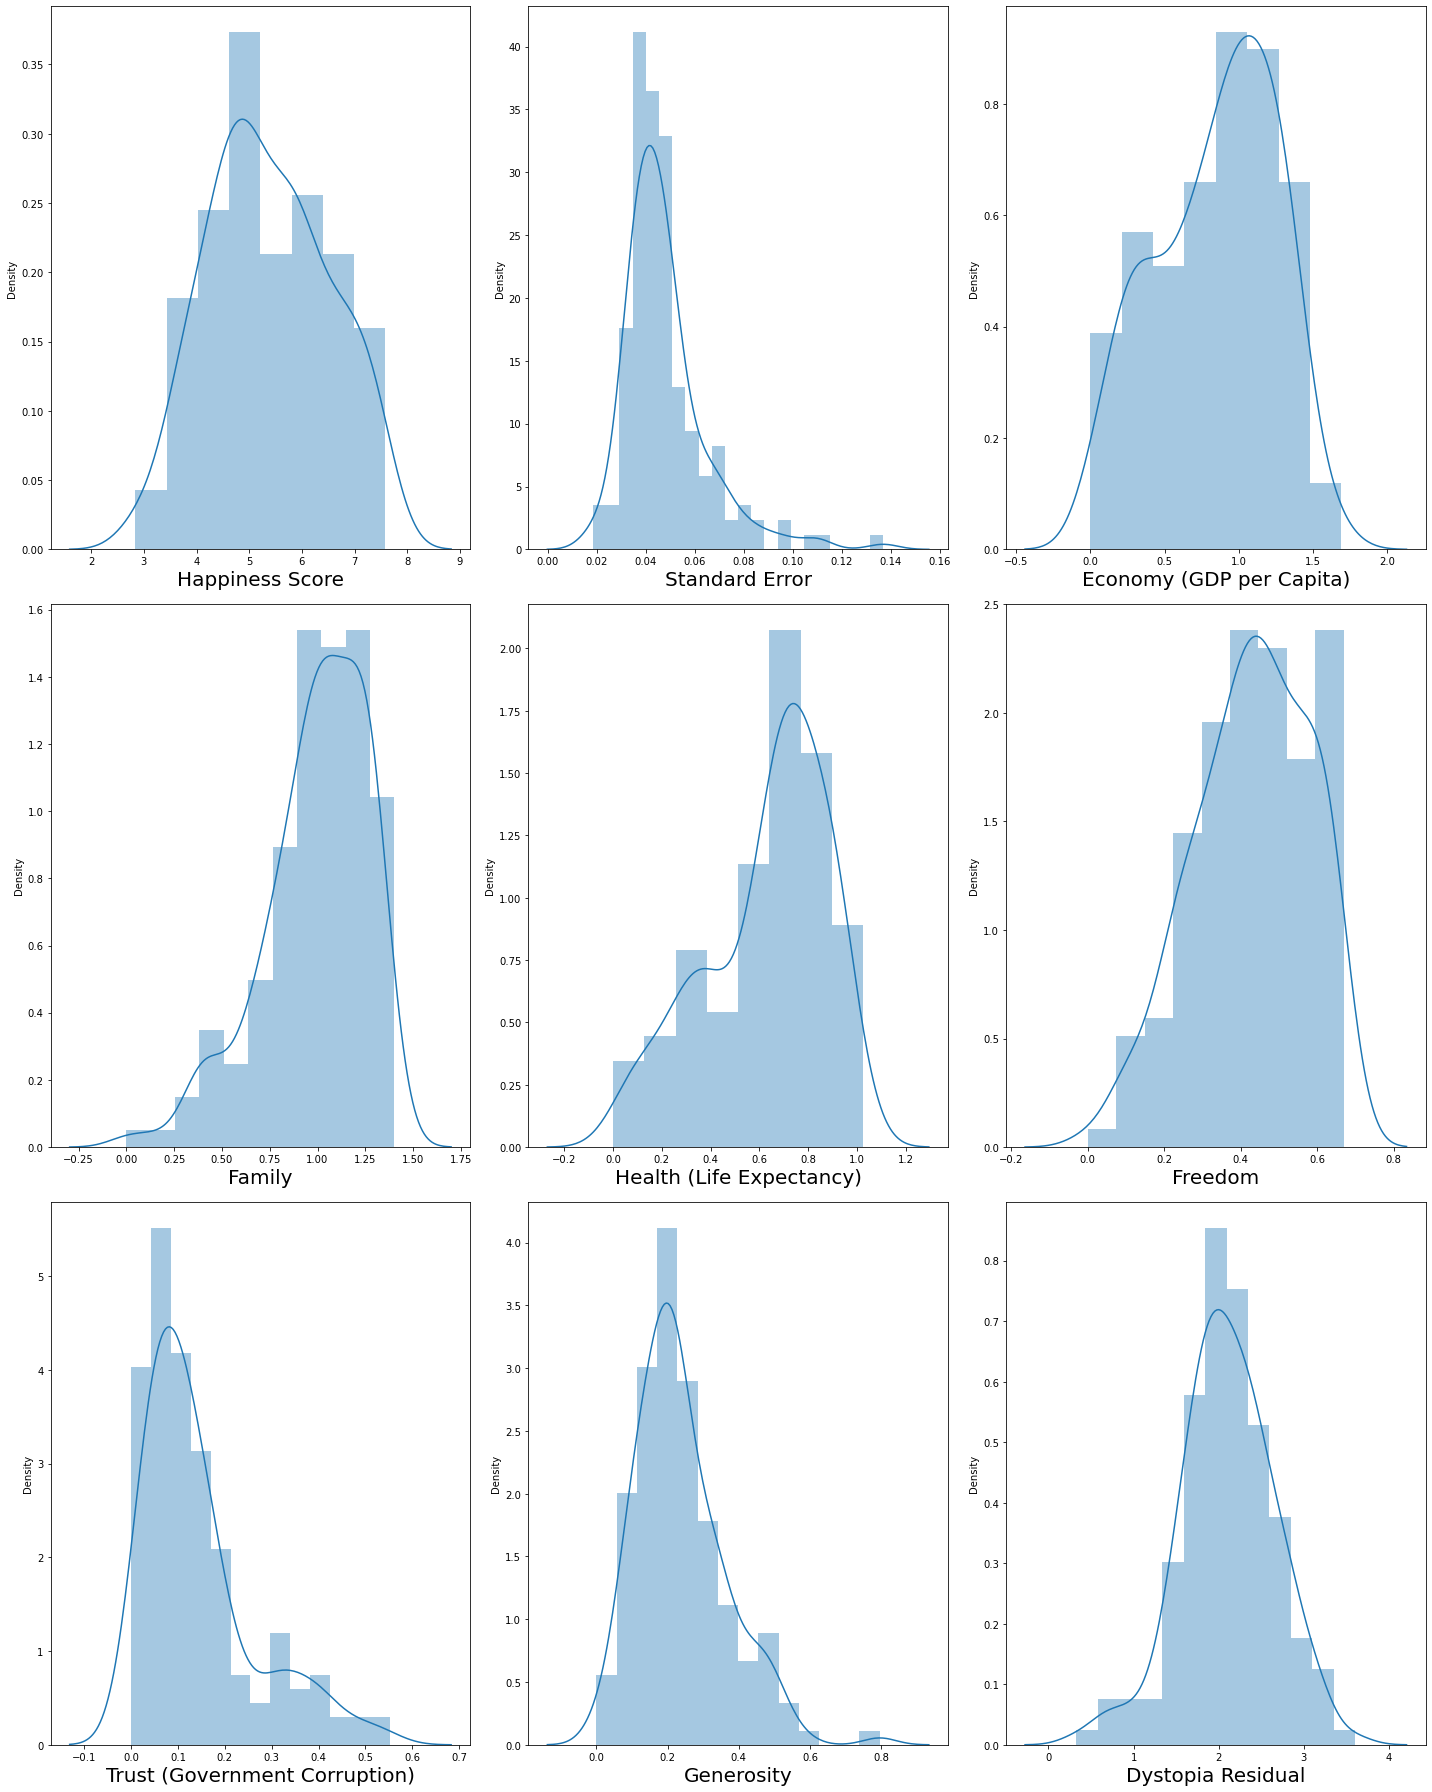

In [11]:
#lets visualise the data, how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in happiness_file:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(happiness_file[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

In [12]:
#Using zscore to eliminate some ot the skewness in the data
#Already imported zscore from the scipy.stats
#abs=Absolute Number
z=np.abs(stats.zscore(happiness_file))
print(z)

[[1.93736005 0.80592569 1.36962124 ... 2.30965159 0.47103971 0.75825809]
 [1.91458063 0.05588945 1.13522625 ... 0.01647953 1.57585637 1.09285682]
 [1.88479215 0.8544869  1.19286069 ... 2.8427738  0.8242928  0.71233526]
 ...
 [2.0761992  0.13253425 0.45524543 ... 0.38141902 1.85689094 3.20843049]
 [2.1646885  2.26396166 2.06756644 ... 0.35771452 0.31694987 0.48198451]
 [2.22251319 1.13418227 1.58633379 ... 0.30180313 0.5581534  0.96361241]]


In [13]:
#Printing number of rows having more than 3 standard deviation
print('Number of rows having more than 3STD \n',np.where(z>3)[0]) 

Number of rows having more than 3STD 
 [ 27  40  64 115 128 147 153 155 157]


In [14]:
#Printing number of columns having more than 3 standard deviation
print('Number of columns having more than 3STD \n',np.where(z>3)[1])

Number of columns having more than 3STD 
 [6 1 1 1 7 3 6 8 3]


In [15]:
index=(np.where(z>3)[0])
happiness_file=happiness_file.drop(happiness_file.index[index]) 

In [16]:
happiness_file.shape

(149, 9)

If we compare before shape of the data and now we can know that some of indexes got removed after using the zscore

Now lets see the heat map to find the corelation between the features(Multi colinearity)

In [18]:
y=happiness_file['Happiness Score']
x=happiness_file.drop(columns=['Happiness Score'])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

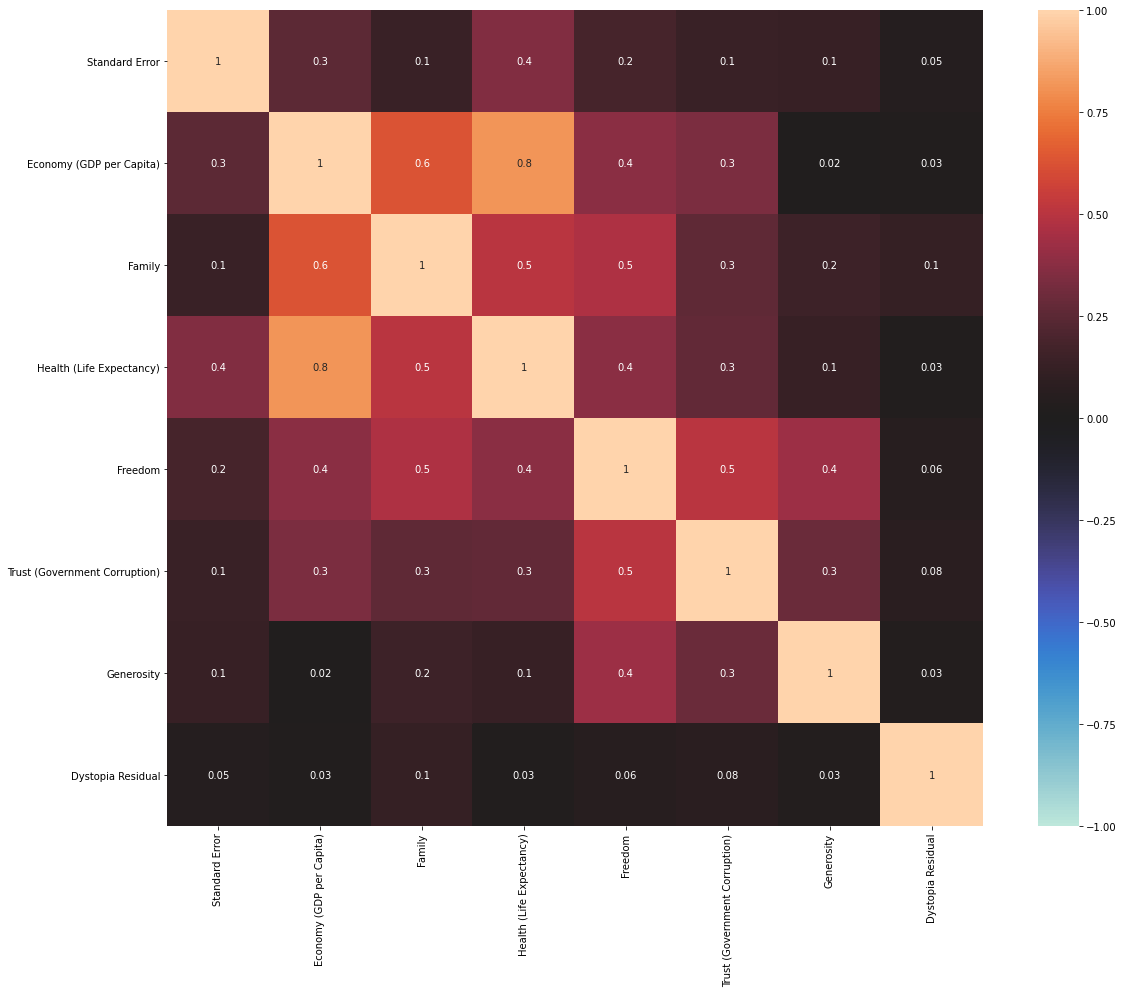

In [19]:
#lets plot heat map and see how the features are corrleated to each other or to check multi collinearity
df_corr=x.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g')
plt.tight_layout 


From heat map we got to know that there is no relation between the features

In [20]:
#lets build our model by using linear regression
#lets import some modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#scaling the data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.86678606,  1.38191593,  1.35787859, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [ 0.18566863,  1.13832385,  1.5678818 , ...,  0.00924715,
         1.71389767,  1.10929978],
       [-0.92608935,  1.19821973,  1.40197448, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.10042671, -1.40259581, -2.81135429, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-0.69173419, -1.48837933, -2.60816264, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [ 2.88218185, -2.19013866, -2.36115394, ..., -0.35206708,
        -0.28645792, -0.54943602]])

In [21]:
#split data into train & test where model will be built on training data and tested on test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=400)
#Instantiating the model and training the data
regression=LinearRegression()
#Lets fit the model
regression.fit(x_train,y_train) 

LinearRegression()

In [22]:
#checking for R2 Score for train data
regression.score(x_train,y_train)

0.9999999393531883

In [23]:
#checking for R2 Score for test data
regression.score(x_test,y_test)*100 

99.99999275679285

In [24]:
y_predict=regression.predict(x_test)
y_predict

array([5.81252094, 4.6423771 , 6.75012728, 6.57404679, 4.50724658,
       4.34999545, 3.95562931, 7.27769692, 4.69393507, 6.00268693,
       5.82410909, 7.18723424, 5.85523124, 5.6887357 , 2.90455771,
       6.86719263, 5.58863446, 4.95934968, 5.75439426, 4.2965958 ,
       6.78622289, 5.25285033, 4.78792277, 4.63348421, 6.81019833,
       7.28395155, 7.3635721 , 5.94821175, 5.75859624, 4.41932242,
       5.97517967, 5.71590855, 6.66965811, 5.79062636, 5.54814982,
       4.21853434, 4.19430819, 3.66727536])

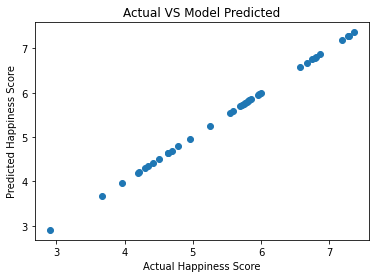

In [25]:
#lets plot and visualise
y_pred=regression.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual VS Model Predicted')
plt.show() 

In [26]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=regression.predict(x_test)
mean_absolute_error(y_test,y_pred) 

0.00026635667406263

In [27]:
mean_squared_error(y_test,y_pred)

8.96040588666628e-08

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.00029933937072604196

In [29]:
#Regularising the model using lasso cv (Regularisation means our model is going to identify the patterns by using learning rate)
#Using Lasso CV to find the learning rate
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas=np.arange(0.002,1,0.02),max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(alphas=array([0.002, 0.022, 0.042, 0.062, 0.082, 0.102, 0.122, 0.142, 0.162,
       0.182, 0.202, 0.222, 0.242, 0.262, 0.282, 0.302, 0.322, 0.342,
       0.362, 0.382, 0.402, 0.422, 0.442, 0.462, 0.482, 0.502, 0.522,
       0.542, 0.562, 0.582, 0.602, 0.622, 0.642, 0.662, 0.682, 0.702,
       0.722, 0.742, 0.762, 0.782, 0.802, 0.822, 0.842, 0.862, 0.882,
       0.902, 0.922, 0.942, 0.962, 0.982]),
        max_iter=100, normalize=True)

In [30]:
#checking for best alpha parameter
alpha=lasscv.alpha_
alpha

0.002

In [31]:
lasso=Lasso(alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.002)

In [32]:
lasso.score(x_test,y_test)*100

99.99888926915474

From above regression.score and lasso.score both r same so by this we can conclude that our model is not overfitting